In [70]:
import numpy as np
import pickle
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import pickle
%matplotlib inline

ratings_fin_data= pickle.load(open("ratings_AND_fin_data_ebit_ebitda_div_profit.p","rb"))
# Note- I think initial ratings go back to 2011
ratings_fin_data.head()

,ticker,Name,Sector,company,financial year end (month),industry code,indicator,Q1-2009,Q2-2009,Q3-2009,...,Q1-2017,Q2-2017,Q3-2017,Q4-2017,Q1-2018,Q2-2018,Q3-2018,missing data points (source),start date for uninterrupted values,company_ratings
0,MMM,3M Company,Industrials,3M,12,100001,EBIT,803,1191,1478,...,1713,1723,2041,1757,983,NaN,NaN,0,Q1-2008,4.1
1,MMM,3M Company,Industrials,3M,12,100001,EBITDA,1074.0,1489.0,1768.0,...,2151.0,2103.0,2418.0,2106.0,1365.0,NaN,NaN,0,Q3-2008,4.1
2,MMM,3M Company,Industrials,3M,12,100001,Net Profit,518,783,957,...,1323,1583,1429,523,602,NaN,NaN,0,Q1-2008,4.1
3,MMM,3M Company,Industrials,3M,12,100001,Dividends,-354,-355,-361,...,-702,-701,-701,-699,-810,NaN,NaN,0,Q3-2008,4.1
4,AOS,A.O. Smith Corp,Industrials,Smith A O Corp,12,100001,EBIT,16,33,46,...,NaN,128,130,143,128,NaN,NaN,0,Q1-2009,3.9


In [71]:
#Reformat: Company Ratings as Numeric
ratings_fin_data["company_ratings"] = ratings_fin_data["company_ratings"].apply(pd.to_numeric)


ratings_fin_data["company_ratings"].head()



0    4.1
1    4.1
2    4.1
3    4.1
4    3.9
Name: company_ratings, dtype: float64

In [72]:
#Reformat: Quarterly Data as Numeric

def year_to_num():
    year_strings = []
    for year in range(9,19):
        if year == 9:
            year = "0" + str(9)
        else:
            year = str(year)
        year = "20"+year
        for q in range(1,5):
            qyear = "Q{}-{}".format(q,year)
            year_strings.append(qyear)
    year_strings = year_strings[:-1]
    return(year_strings)

strings_for_dates = year_to_num()
ratings_fin_data[strings_for_dates] = ratings_fin_data[strings_for_dates].apply(pd.to_numeric)

In [73]:
ratings_fin_data.dtypes

ticker                                  object
Name                                    object
Sector                                  object
company                                 object
financial year end (month)              object
industry code                           object
indicator                               object
Q1-2009                                float64
Q2-2009                                float64
Q3-2009                                float64
Q4-2009                                float64
Q1-2010                                float64
Q2-2010                                float64
Q3-2010                                float64
Q4-2010                                float64
Q1-2011                                float64
Q2-2011                                float64
Q3-2011                                float64
Q4-2011                                float64
Q1-2012                                float64
Q2-2012                                float64
Q3-2012      

In [74]:
#Dummify: Sector Data

ratings_fin_sector_data= pd.get_dummies(ratings_fin_data,
                                        columns = ["Sector"], prefix = ["sector-"])




In [24]:
#Create a reduced data frame to visualize pair-plots for profits
ratings_fin_data_sector_profits = ratings_fin_data[ratings_fin_data["indicator"] =="Net Profit"]
ratings_fin_data_sector_profits = ratings_fin_data_sector_profits.drop_duplicates().reset_index()

ratings_fin_data_sector_profits.tail()



,index,ticker,Name,Sector,company,financial year end (month),industry code,indicator,Q1-2009,Q2-2009,...,Q1-2017,Q2-2017,Q3-2017,Q4-2017,Q1-2018,Q2-2018,Q3-2018,missing data points (source),start date for uninterrupted values,company_ratings
479,1951,XYL,Xylem Inc.,Industrials,Xylem Inc.,NaN,100001,Net Profit,NaN,NaN,...,56.0,99.0,NaN,NaN,NaN,NaN,NaN,0,Q3-2010,3.6
480,1955,YUM,Yum! Brands Inc,Consumer Discretionary,YUM BRANDS INC,12,103003,Net Profit,218.0,303.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,Q3-2008,3.9
481,1959,ZBH,Zimmer Biomet Holdings,Health Care,Zimmer Biomet Holdings,12,106004,Net Profit,202.0,210.0,...,299.0,184.0,98.0,NaN,NaN,NaN,NaN,0,Q1-2008,NaN
482,1963,ZION,Zions Bancorp,Financials,Zions Bancorp,12,104002,Net Profit,-853.0,-24.0,...,129.0,154.0,150.0,NaN,NaN,NaN,NaN,0,Q1-2009,3.7
483,1967,ZTS,Zoetis,Health Care,Zoetis,NaN,106005,Net Profit,NaN,NaN,...,NaN,247.0,298.0,81.0,352.0,NaN,NaN,0,Q1-2012,3.7


                 company_ratings   Q3-2017
company_ratings         1.000000  0.136562
Q3-2017                 0.136562  1.000000


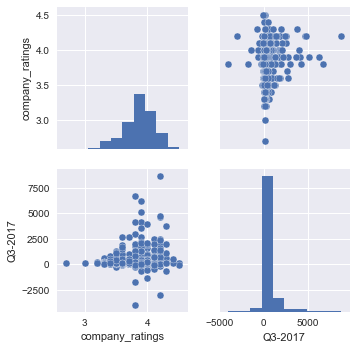

In [39]:
# Use Seaborn to visualize correlations
# can do this 
pairplot_prof_vs_ratings = pd.DataFrame()
pairplot_prof_vs_ratings = ratings_fin_data_sector_profits[["company_ratings","Q3-2017"]]
pairplot_prof_vs_ratings = pairplot_prof_vs_ratings.dropna(how = "any")
pairplot_prof_vs_ratings.shape
print(pairplot_prof_vs_ratings.corr())
sns.pairplot(pairplot_prof_vs_ratings)

# Post-mortem notes:
# As it turns out, plotting all of the possible correlations will be a long time because of
# of the number of columns 
# more-over, it's weird to do correlations on dummy data (I think you have to use a differ
# ent type of correlation- point biserial or something, not sure what seaborn does under
# the hood)
#  Therefore, abandon the plot strategy, and calculate correlations directly
# between columns on profit (ignoring other measures, e.g. EBIT etc), and the company
# ratings.

In [68]:
# Time for some data mining -  Since seaborn can't plot all the correlations I need in a 
# A reasonable time frame, calculate them and put them into an ordered list
import operator
def correlate_strings(dates):
    correlations_by_quarter = {}
    for quarter in dates:
        correlation = ratings_fin_data_sector_profits["company_ratings"].corr(
            ratings_fin_data_sector_profits[quarter])
        correlations_by_quarter[quarter] = correlation
    return (correlations_by_quarter)


        
correlations_by_quarter = correlate_strings(strings_for_dates)

print ("\n \n")

# from https://stackoverflow.com/questions/613183/how-do-i-sort-a-dictionary-by-value
sorted_by_value = sorted(correlations_by_quarter.items(), key=lambda kv: kv[1])

print("sorted by value")
print (sorted_by_value)

corr_values = np.array(list(correlations_by_quarter.values() ))

print("mean and stdev")
print(corr_values.mean(), np.sqrt(corr_values.var()))

# Practical notes for sorting these out:  Not many entries for 2018, so maybe ignore those
# A quick check of indeed reveals some ratings don't go  back past 2012, so probably also 
# ignore those-

# This whole set-up is tricky because I couldn't get ratings over time (data was on website
# but hard to scrape).  Orignally, (in Transformations_and_visualizations_ratings_fin (1)-
# notebook),
# I had tried calculating "Change in profits over time" to better align the ratings data (
# which spans 6 years). (That measure also makes between-company profits more comparable
# (using a % change in profits over time allows a better comparison between big and small
# companies)).  Doing that, however, meant dropping a lot of data, because in aggregating 
# across quarters, I ended up having to drop a greater number of rows (e.g. if either
# start or end row (for the calculation) was absent, I would have to exclude the row).
# Selected a representative quarter (in terms of the "average correlation between profits
# and ratings")  (Where rating)
# obviously, this sort of cherry picking is "bad form" in the real world- but I at least
# wanted to look at a year that had some interesting correlations (even if they are 
# spurious/artifacts), for the purpose of learning to work with the analysis tools,
# like Lasso, etc.)
#

# mean and var
# 0.100308615869 0.0336427091238

# So, for the purposes of future modeling,  I am going to select a quarter with a 
# a "representative" correlation (within one standard deviation of the average correlation)
# and a "representative" number of nulls (within one SD of the number of nulls-
# (bc of skewness could actually probably do less than this, re: number of nulls)).


 

sorted by value
[('Q3-2018', -1.0), ('Q4-2017', -0.010207916121146429), ('Q4-2015', 0.021574277802232575), ('Q4-2014', 0.054342604215684903), ('Q2-2018', 0.064457157908373863), ('Q1-2009', 0.09507153954401705), ('Q4-2011', 0.095180511988734465), ('Q4-2012', 0.095857179908322515), ('Q1-2015', 0.096119284959986895), ('Q3-2015', 0.098998045021319064), ('Q4-2010', 0.11610737722285881), ('Q2-2016', 0.11695932713833543), ('Q2-2015', 0.12227141040689954), ('Q3-2012', 0.12369089600768002), ('Q4-2009', 0.13003441896100601), ('Q3-2016', 0.1306656432145005), ('Q2-2012', 0.13233753728305572), ('Q3-2010', 0.13273727103155614), ('Q1-2016', 0.13301204854661489), ('Q4-2016', 0.13334728598375425), ('Q3-2017', 0.13656239516539981), ('Q1-2014', 0.13733325950957187), ('Q2-2017', 0.14070804557773917), ('Q1-2013', 0.14188172041767563), ('Q1-2017', 0.1432178966540209), ('Q2-2014', 0.15021574480638775), ('Q2-2009', 0.15117793061570869), ('Q3-2011', 0.15129010875184254), ('Q2-2011', 0.15603803756246845), (

In [69]:
correlations_by_quarter["Q4-2016"]
# 0.13334728598375425

0.13334728598375425

In [65]:
# Calculate number of nulls or NaN per quarter
# only["Q1-2017"].isnull().sum() )

def check_nulls(dates):
    num_nulls_quarter = {}
    for quarter in dates:
        num_nulls = ratings_fin_data_sector_profits[quarter].isnull().sum()
        num_nulls_quarter[quarter] = num_nulls
    return (num_nulls_quarter)


nulls_by_quarter = check_nulls(strings_for_dates)

print ("\n \n")

# from https://stackoverflow.com/questions/613183/how-do-i-sort-a-dictionary-by-value
sorted_by_value_nulls = sorted(nulls_by_quarter.items(), key=lambda kv: kv[1])

print("sorted by value_nulls")
print (sorted_by_value_nulls)

nulls_values = np.array(list(nulls_by_quarter.values() ))

print(nulls_values)
print("mean and stdev")
print(nulls_values.mean(), np.sqrt(nulls_values.var()))


# Note that this only includes numbers of nulls per quarterly column, not for other data
# Note that the more recent data skews this pretty highly
#mean and values
# 80.1025641026 103.919296812

# [('Q4-2015', 22), ('Q4-2014', 24), ('Q1-2014', 25), ('Q2-2014', 25), ('Q1-2015', 25),
# ('Q3-2014', 25), ('Q2-2015', 26), ('Q3-2013', 26), ('Q3-2015', 26), ('Q4-2013', 27), 
# ('Q1-2013', 27), ('Q2-2013', 28), ('Q4-2016', 28), ('Q1-2012', 36), ('Q3-2012', 36), 
# ('Q4-2012', 36), ('Q2-2012', 36), ('Q3-2011', 36), ('Q4-2011', 37), ('Q2-2011', 39), 
# ('Q1-2011', 41), ('Q3-2010', 42), ('Q4-2010', 44), ('Q2-2010', 46), ('Q1-2010', 51), 
# ('Q2-2017', 65), ('Q3-2017', 76), ('Q1-2016', 81), ('Q4-2009', 82), ('Q3-2009', 83), 
# ('Q1-2009', 87), ('Q2-2009', 89), ('Q2-2016', 92), ('Q3-2016', 114), ('Q4-2017', 155), 
# ('Q1-2017', 166), ('Q1-2018', 269), ('Q2-2018', 470), ('Q3-2018', 481)]



 

sorted by value_nulls
[('Q4-2015', 22), ('Q4-2014', 24), ('Q1-2014', 25), ('Q2-2014', 25), ('Q1-2015', 25), ('Q3-2014', 25), ('Q2-2015', 26), ('Q3-2013', 26), ('Q3-2015', 26), ('Q4-2013', 27), ('Q1-2013', 27), ('Q2-2013', 28), ('Q4-2016', 28), ('Q1-2012', 36), ('Q3-2012', 36), ('Q4-2012', 36), ('Q2-2012', 36), ('Q3-2011', 36), ('Q4-2011', 37), ('Q2-2011', 39), ('Q1-2011', 41), ('Q3-2010', 42), ('Q4-2010', 44), ('Q2-2010', 46), ('Q1-2010', 51), ('Q2-2017', 65), ('Q3-2017', 76), ('Q1-2016', 81), ('Q4-2009', 82), ('Q3-2009', 83), ('Q1-2009', 87), ('Q2-2009', 89), ('Q2-2016', 92), ('Q3-2016', 114), ('Q4-2017', 155), ('Q1-2017', 166), ('Q1-2018', 269), ('Q2-2018', 470), ('Q3-2018', 481)]
[ 24  27 114  89 470  27  25  65  36  28  36  76  28  25 155  25 481  25
  36  26  37  41  36  82  81  36  87  46  39  22  26  83  26  42  92  51
 166  44 269]
mean and values
80.1025641026 103.919296812


In [ ]:
#############################
# All Code below is old and can be ignored...

In [ ]:
ticker_ratings_df = pd.DataFrame()
ticker_ratings_df["ticker"]  =  ratings_fin_data["ticker"]
ticker_ratings_df["company_ratings"] = ratings_fin_data["company_ratings"]
ticker_ratings_df.drop_duplicates().reset_index()



In [ ]:
# use seaborn to visualize pairs
#import seaborn as sns


#graph=sns.pairplot(ratings_fin_data)

In [ ]:
# Barplot of ratings by company, not super informative
# though one interesting really high outlier

ticker_ratings_df.dtypes
ticker_ratings_df["company_ratings"] = ticker_ratings_df["company_ratings"].apply(pd.to_numeric)

ticker_ratings_df.plot.bar(x = "ticker" , y= "company_ratings")





In [ ]:
high_scores = ticker_ratings_df[ticker_ratings_df["company_ratings"] >4.5]
print(high_scores)
# kind of weird when double checking...

In [ ]:
ticker_ratings_df.hist()

drop_dup_tick_ratings= ticker_ratings_df.drop_duplicates().reset_index()
# maybe normally distributed?
# or skewed, yea, seems skewed, leftward
# lots of responses in the 3.4/3.5/.6 range- cutoff around 4.3?

In [ ]:
# previous hist forgot to drop duplicates
drop_dup_tick_ratings= ticker_ratings_df.drop_duplicates().reset_index()
drop_dup_tick_ratings.hist(column = "company_ratings", bins = 10)

# may want to transform?

In [ ]:
# calculate % increase as (ym1-y0)/ym1
import numpy as np
def percent_change(curr_year, last_year):
    if last_year == 0:
        return 0          # could also do a try with, else  thing here
    ans = ((curr_year-last_year)/last_year)
    return ans

# convert relevant columns to numeric
ratings_fin_data["Q1-2017"] = ratings_fin_data["Q1-2017"].apply(pd.to_numeric)
ratings_fin_data["Q1-2018"] = ratings_fin_data["Q1-2018"].apply(pd.to_numeric)


#attempt to vectorize, following below
# https://stackoverflow.com/questions/19914937/applying-function-with-multiple-arguments-to-create-a-new-pandas-column/19976286
ratings_fin_data["percent_increase_2017Q1-2018Q1"] =np.vectorize(percent_change)(
    ratings_fin_data["Q1-2017"],ratings_fin_data["Q1-2018"]) 




In [ ]:
print(ratings_fin_data.head())
print(ratings_fin_data.tail())

ratings_fin_data

In [ ]:
#filter only for profit data
ratings_fin_data_profit_increase_only = ratings_fin_data[ratings_fin_data["indicator"] =="Net Profit"]

 
#ratings_fin_data.hist(columns = "percent_increase_2017Q1-2018Q1")

In [ ]:
ratings_fin_data

In [ ]:
ratings_fin_data_profit_increase_ratings_dummies = pd.get_dummies(ratings_fin_data_profit_increase_only,
                                                                 columns = ["Sector"], prefix = ["sector-"] )

ratings_fin_data_profit_increase_ratings_dummies.head()


In [ ]:
#check for null values
print(ratings_fin_data_profit_increase_only["Q1-2017"].isnull().sum() )
print(ratings_fin_data_profit_increase_only["Q1-2018"].isnull().sum())
print (ratings_fin_data_profit_increase_only["percent_increase_2017Q1-2018Q1"].isnull().sum())
# null vals for above
#166
#269
#351
#Why aren't these nulls adding up?
# some overlap?

In [ ]:
ratings_fin_data_profit_increase_only.hist(column = "percent_increase_2017Q1-2018Q1")


In [ ]:
df_for_correlation_year_profit_ratings = pd.DataFrame()
df_for_correlation_year_profit_ratings["percent_increase"] = ratings_fin_data_profit_increase_only["percent_increase_2017Q1-2018Q1"]
df_for_correlation_year_profit_ratings["company_ratings"] = ratings_fin_data_profit_increase_only["company_ratings"].apply(pd.to_numeric)
df_for_correlation_year_profit_ratings.corr()

In [ ]:
df_for_correlation_year_profit_ratings.plot.scatter(x = "percent_increase", y = "company_ratings")

In [ ]:
def list_nulls_year(year_s, df):
    null_dict = {}
    for i in range(1,5):
        q = "Q{}-".format(i)
        qyear = q+year_s
        nulls = df[qyear].isnull().sum()
        null_dict[qyear] = nulls
        
    return(null_dict)

def list_nulls_2018(year_s, df):  #special bc no q4
    null_dict = {}
    for i in range(1,4):
        q = "Q{}-".format(i)
        qyear = q+year_s
        nulls = df[qyear].isnull().sum()
        null_dict[qyear] = nulls
    return(null_dict)
    
null_16 = list_nulls_year("2016",ratings_fin_data_profit_increase_only)
print(null_16)

null_17 = list_nulls_year("2017",ratings_fin_data_profit_increase_only)
print(null_17)

null_18 = list_nulls_2018("2018",ratings_fin_data_profit_increase_only)
print(null_18)

        
        
# looking at the lists of Nulls, a time span with low potential nulls relative to the group
# is Q2 2016 to Q2 2017

In [ ]:
# Think about partialing out variance in price due to overall market trends...
# https://www.marketwatch.com/investing/index/spx/historical

# try a regression on:  
from sklearn.linear_model import LinearRegression

lr_ratings_pred_prof = LinearRegression()

In [ ]:
df_for_reg = pd.DataFrame()
df_for_reg["company_ratings"] = df_for_correlation_year_profit_ratings["company_ratings"]
df_for_reg["percent_increase"] = df_for_correlation_year_profit_ratings["percent_increase"]

df_for_reg.reset_index()

df_for_reg = df_for_reg.dropna().reset_index().transpose()
print(df_for_reg)


matrix_for_reg      = df_for_reg.as_matrix(columns=df_for_reg.columns[1:])

ratings       = matrix_for_reg[1]
profit_change = matrix_for_reg[2]

ratings = ratings.reshape(-1,1)
profit = profit_change.reshape(-1,1)

print(ratings, profit)

# below: predictors, values
lr_ratings_pred_prof.fit(ratings,
                   profit_change )


In [ ]:
#
r_squared = lr_ratings_pred_prof.score(ratings,
                   profit_change )

print(r_squared)

In [ ]:
ratings_fin_data_profit_increase_ratings_dummies.head()


In [ ]:
sector_cols = [col for col in ratings_fin_data_profit_increase_ratings_dummies.columns if 'sector-' in col]
print (sector_cols)

In [ ]:
sectors_as_matrix = ratings_fin_data_profit_increase_ratings_dummies.as_matrix(
    columns = [sector_cols])



In [ ]:
print(sectors_as_matrix)


In [ ]:
sector_cols = [col for col in ratings_fin_data_profit_increase_ratings_dummies.columns if 'sector-' in col]
print(sector_cols)
df_sector_reg = pd.DataFrame()

df_sector_reg["company_ratings"] = ratings_fin_data_profit_increase_ratings_dummies["company_ratings"].apply(pd.to_numeric)
df_sector_reg[sector_cols]  =  ratings_fin_data_profit_increase_ratings_dummies[sector_cols]

df_sector_reg_clean = df_sector_reg.dropna().reset_index()


#df_sector_reg_clean = df_sector_reg_clean[np.logical_not(np.isnan(
#    df_sector_reg_clean["company_ratings"]))]

#df_sector_reg_clean = df_sector_reg_clean.reset_index(drop=True)                                                        
                                                         

df_sector_reg_clean.head()
# check for nulls
#null_columns= df_sector_reg.columns[df_sector_reg.isnull().any()]
#print(df_sector_reg[df_sector_reg.isnull().any(axis=1)][null_columns].head())

y = df_sector_reg_clean["company_ratings"]
y = y.values.reshape(-1,1)
print(y)
X = df_sector_reg_clean[sector_cols]

print(X)







In [ ]:
from sklearn.linear_model import LinearRegression
lr_ratings_sector = LinearRegression()

lr_ratings_sector.fit(y, X)
s = lr_ratings_sector.score(y, X)
print(s)

In [ ]:
# Train and Test on sector by ratings
# Python 2 & 3 Compatibility# Pytho 
from __future__ import print_function, division

# Necessary imports
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import RidgeCV
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import KFold
import matplotlib.pyplot as plt

from sklearn.linear_model import LassoCV

%matplotlib inline


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.7, random_state=29)



In [ ]:
#use preset alphas for the first go-round
# Also, note, have not removed dummy coding here
lasso_sector = LassoCV(cv = 10)
lasso_sector.fit(X_train, y_train)
score = lasso_sector.score(X_test, y_test)

In [ ]:
print(score)